# Churned Customer Study Notebook

## Objectives

*   Answer business requirement 1: 
    * The client is interested to understand the patterns from the patient data in order to better predict the likelyhood of heart failure in a patient.

## Inputs

* outputs/datasets/collection/heart-failure.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build Streamlit App






---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/ML-heart-disease-indicator/jupyter_notebooks'

We want to make the parent of current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/ML-heart-disease-indicator'

---

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/heart-failure.csv"))
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

In [5]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation Study

We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations
* We know this command returns a pandas series and the first item is the correlation between Churn and Churn, which happens to be 1, so we exclude that with `[1:]`
* We sort values considering the aboslute value, by setting `key=abs`

In [9]:
corr_spearman = df.corr(method='spearman')['DEATH_EVENT'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

time                       -0.543179
serum_creatinine            0.370630
ejection_fraction          -0.286869
age                         0.218125
serum_sodium               -0.209837
high_blood_pressure         0.079351
anaemia                     0.066270
platelets                  -0.046200
creatinine_phosphokinase    0.023616
smoking                    -0.012623
Name: DEATH_EVENT, dtype: float64

We do the same for `pearson`

In [11]:
corr_pearson = df.corr(method='pearson')['DEATH_EVENT'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

time                       -0.526964
serum_creatinine            0.294278
ejection_fraction          -0.268603
age                         0.253729
serum_sodium               -0.195204
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
platelets                  -0.049139
smoking                    -0.012623
Name: DEATH_EVENT, dtype: float64

For both methods, we notice weak or moderate levels of correlation between DEATH_EVENT and a given variable. 
* Ideally, we pursue at strong correlation levels or more. However, this is not always possible

We will consider the top 7 correlation levels at `df`

In [12]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time'}

Therefore we are studying at df the following variables. We will investigate if:
* A patient who dies of heart failure typically has low/high age (to be edited)
* A patient who dies of heart failure typically has low/high ejection fraction (to be edited)
* A patient who dies of heart failure typically has low/high Level of serum creatinine in the blood (mg/dL) (to be edited)
* A patient who dies of heart failure typically has low/high Level of serum sodium in the blood (mEq/L) (to be edited)
* A patient who dies of heart failure typically has low/high Follow-up period (days) (to be edited)

In [13]:
vars_to_study = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
vars_to_study

['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

# EDA on selected variables

In [19]:
df_eda = df.filter(vars_to_study + ['DEATH_EVENT'])
df_eda.head(3)

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20,1.9,130,4,1
1,55.0,38,1.1,136,6,1
2,65.0,20,1.3,129,7,1


## Variables Distribution by Death Event

We plot the distribution (numerical and categorical) colored by Death Event

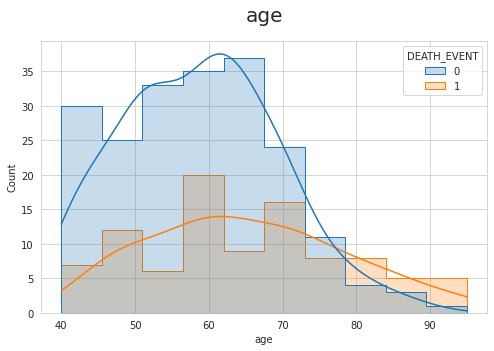

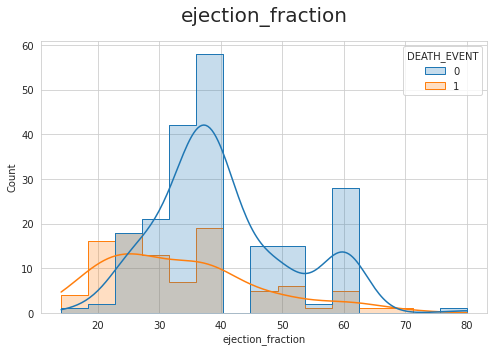

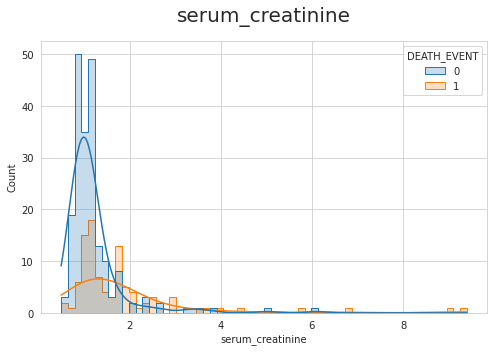

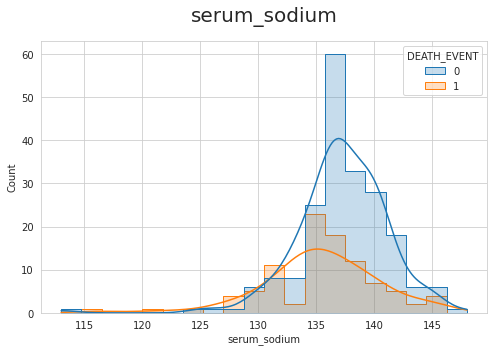

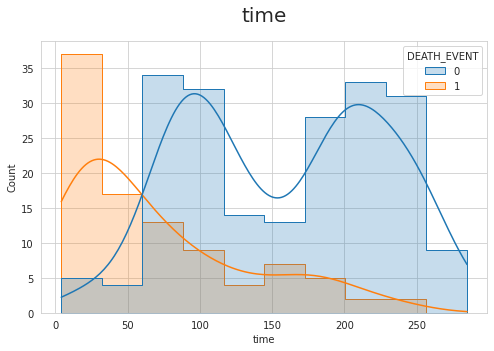

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

def plot_categorical(df, col, target_var):

  plt.figure(figsize=(12, 5))
  sns.countplot(data=df, x=col, hue=target_var,order = df[col].value_counts().index)
  plt.xticks(rotation=90) 
  plt.title(f"{col}", fontsize=20,y=1.05)        
  plt.show()

def plot_numerical(df, col, target_var):
  plt.figure(figsize=(8, 5))
  sns.histplot(data=df, x=col, hue=target_var, kde=True,element="step") 
  plt.title(f"{col}", fontsize=20,y=1.05)
  plt.show()



target_var = 'DEATH_EVENT'
for col in vars_to_study:
  if df_eda[col].dtype == 'object':
    plot_categorical(df_eda, col, target_var)
    print("\n\n")
  else:
    plot_numerical(df_eda, col, target_var)
    print("\n\n")

---

## Parallel Plot (CONTINUE HERE)
### NEXT STEP: CREATE BINS FOR ALL VARIABLES

Create a separate DataFrame and transform `time` (numerical) into bins (categorical) for visualizing at `parallel_categories()` plot


In [27]:
from feature_engine.discretisation import ArbitraryDiscretiser
import numpy as np
time_map = [-np.Inf, 50, 100, 150, 200, 250, np.Inf]
disc = ArbitraryDiscretiser(binning_dict={'time': time_map})
df_parallel = disc.fit_transform(df_eda)
df_parallel.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20,1.9,130,0,1
1,55.0,38,1.1,136,0,1
2,65.0,20,1.3,129,0,1
3,50.0,20,1.9,137,0,1
4,65.0,20,2.7,116,0,1


In [28]:
disc.binner_dict_['time']

[-inf, 50, 100, 150, 200, 250, inf]

Create map to replace `tenure` variable with more informative levels

In [29]:
n_classes = len(time_map) - 1
classes_ranges = disc.binner_dict_['time'][1:-1]

labels_map = {}
for n in range(0,n_classes):
  if n == 0:
    labels_map[n] = f"<{classes_ranges[0]}"
  elif n == n_classes-1:
    labels_map[n] = f"+{classes_ranges[-1]}"
  else:
    labels_map[n] = f"{classes_ranges[n-1]} to {classes_ranges[n]}"

labels_map

{0: '<50',
 1: '50 to 100',
 2: '100 to 150',
 3: '150 to 200',
 4: '200 to 250',
 5: '+250'}

Replace using `.replace()`

In [30]:
df_parallel['time'] = df_parallel['time'].replace(labels_map)
df_parallel.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,20,1.9,130,<50,1
1,55.0,38,1.1,136,<50,1
2,65.0,20,1.3,129,<50,1
3,50.0,20,1.9,137,<50,1
4,65.0,20,2.7,116,<50,1


Creates multi-dimensional categorical data plot

In [31]:
import plotly.express as px
fig = px.parallel_categories(df_parallel, color="DEATH_EVENT")
fig.show()

---

# Conclusions and Next steps

The correlations and plots interpretation converge. 
* A churned customer typically has a month to month contract
* A churned customer typically has fiber optic
* A churned customer typically doesn't have tech support
* A churned customer doesn't have online security
* A churned customer typically has low tenure levels

---

Well done! You generated code that answers business requirement 1 and can be used to build Streamlit App
* In this notebook we are not pushing any file to the repo
* Clear cell's outputs before moving on!